# Descision Tree

### Predicting Whether a Person Will Buy a Car
Use a Decision Tree algorithm to predict whether a person will buy a car based on simple features like age,
income, marital status, and car ownership history.

### 1. ImportLibraries
We import necessary libraries like (pandas, Numpy, and Scikit_learn)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

## 2.load and Explore Data
We load our dataset into a pandas DataFrame.

We explore the data to understand its structure, missing value, and summary statistics


In [26]:
DT = pd.read_csv(r"C:\Users\sonic\Downloads\car_data.csv")
DT.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [27]:
DT.shape

(1000, 5)

In [28]:
DT.dtypes

User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

In [29]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [7]:
DT.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

# We creat a missing values chart
insull().sum() it will be show Zero its means nothing is missing

<Axes: >

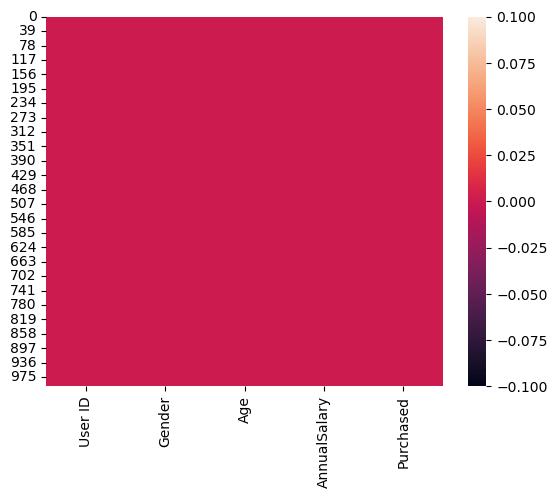

In [30]:
sns.heatmap(DT.isnull())     

## Distribution of variables

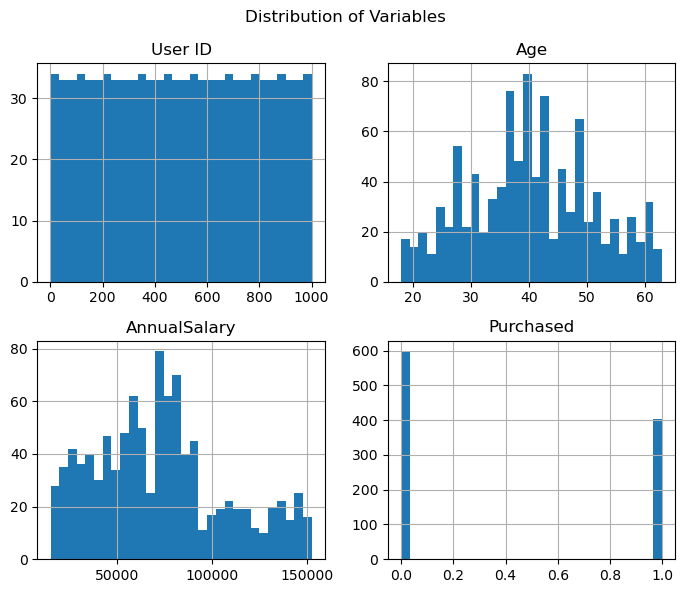

In [31]:
DT.hist(figsize=(7, 6), bins=30)
plt.suptitle("Distribution of Variables")
plt.tight_layout()
plt.show()

## Drop
Also, note that User ID might not be a useful feature for predicting car purchases,
so you might want to drop it before creating the pair plot

In [32]:
DT.drop('User ID', axis=1, inplace=True)

# Visualize the data
## Pairplot to visualize the relationships between features

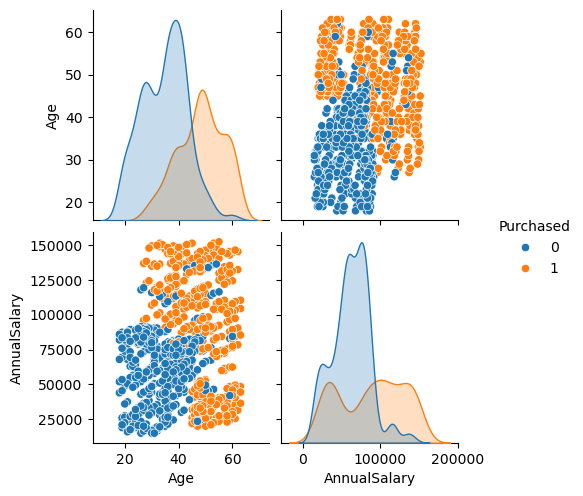

In [33]:
sns.pairplot(DT, hue='Purchased')
plt.show()

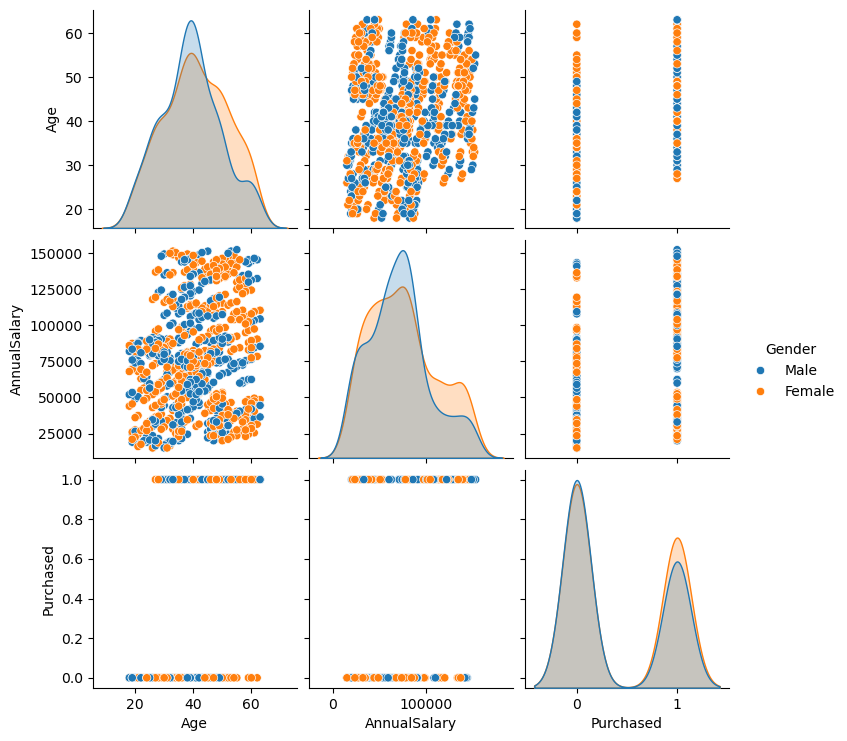

In [12]:
sns.pairplot(DT, hue='Gender')
plt.show()

## Preprocess the data
- Convert the categorical variable 'Gender' to numerical values using LabelEncoder or OneHotEncoder.

In [42]:
from sklearn.preprocessing import LabelEncoder                

In [43]:
le = LabelEncoder()
DT['Gender'] = le.fit_transform(DT['Gender'])

## Split the data into features (X) and target (y)
- Split the data into features (X) and target (y).
- Split the data into training and testing sets (e.g., 80% for training and 20% for testing).

In [44]:
X = DT.drop('Purchased', axis=1)
y = DT['Purchased']

In [45]:
## Split the data into training and testing sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build the decision tree model
- Use a decision tree classifier to build the model.
- Train the model using the training data.


In [47]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

 ## Make predictions and evaluate the model
- Use metrics like accuracy, precision, recall, and F1-score to evaluate the model's performance on the testing data.

In [50]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       112
           1       0.90      0.86      0.88        88

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [51]:
decision = DecisionTreeClassifier()
decision_model = decision.fit(X_train, y_train)

 ### Visualize the decision tree (optional)
- Visualize the decision tree using tools like Scikit-learn's plot_tree function.

In [52]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

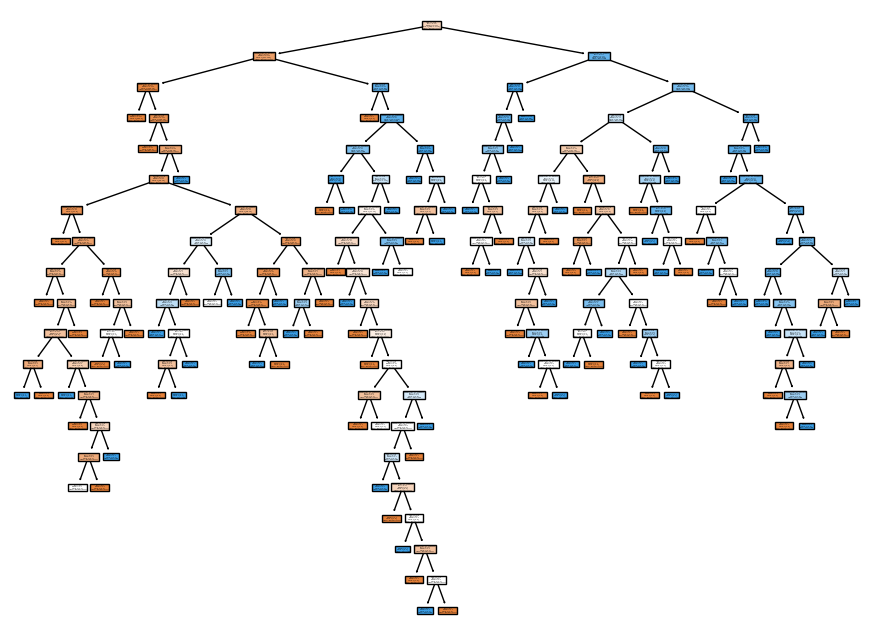

In [53]:
plt.figure(figsize=(11, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)
plt.show()

In [56]:
y_pred_prob = decision.predict_proba(X_test)[:, 1]
y_pred = decision.predict(X_test)

In [58]:
conf = confusion_matrix(y_test, y_pred)
conf

NameError: name 'confusion_matrix' is not defined

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Some potential decision tree rules based on the features could be:
- Age-based rules: If age lies between 31 and 40, the person is likely to buy a car.
- Income-based rules: If income is high, the person is more likely to buy a car.


In [1]:
import pandas as pd

In [59]:
data = [['Alex',10], ['Bob',12],['Clarke',13]]
DT = pd.DataFrame(data,columns = ['Name','Age'])
print(DT)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13
